In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [21]:
kokkos_benchmark_file = "/mnt/d/Downloads/benchmark_results_kokkos_2.csv"
kokkos_data = pd.read_csv(kokkos_benchmark_file, sep=',', header=0)
kokkos_data.head()

,NumElements,LoadFactor,DefaultInsertTime,DefaultSearchTime
0,16384,0.2,3.76920,0.190106
1,16384,0.4,4.68458,0.199865
2,16384,0.6,3.92931,0.187551
3,16384,0.8,3.96846,0.202329
4,16384,1.0,4.93187,0.201527


In [22]:

for column in kokkos_data.columns:
    if "Time" in column:
        kokkos_data['Throughput_' + column] = 1000 * \
            kokkos_data['NumElements'] / kokkos_data[column]
            
kokkos_data.head()

,NumElements,LoadFactor,DefaultInsertTime,DefaultSearchTime,Throughput_DefaultInsertTime,Throughput_DefaultSearchTime
0,16384,0.2,3.76920,0.190106,4.346811e+06,8.618350e+07
1,16384,0.4,4.68458,0.199865,3.497432e+06,8.197533e+07
2,16384,0.6,3.92931,0.187551,4.169689e+06,8.735757e+07
3,16384,0.8,3.96846,0.202329,4.128554e+06,8.097702e+07
4,16384,1.0,4.93187,0.201527,3.322066e+06,8.129928e+07


In [3]:
cuco_benchmark_file = "../cuCollections_test/cucollections_benchmark_results.csv"
cuco_data = pd.read_csv(cuco_benchmark_file, sep=',', header=0)
cuco_data.head()

,NumKeys,LoadFactor,InsertTime,FindTime,InsertThroughput,FindThroughput
0,16384,0.2,0.000223,0.000009,73372100.0,1.840900e+09
1,16384,0.4,0.000248,0.000065,66117800.0,2.528400e+08
2,16384,0.6,0.000245,0.000015,66900800.0,1.107030e+09
3,16384,0.8,0.000262,0.000007,62415200.0,2.244380e+09
4,16384,1.0,0.003434,0.000012,4771110.0,1.412410e+09


In [28]:
data = {}
cgs = [2,4,8,16]
for cg in cgs:
    benchmark_file = f'/mnt/d/Downloads/benchmark_results_cg{cg}.csv'
    data[cg]=pd.read_csv(benchmark_file, sep=',', header=0)
data[2].head()

,NumElements,LoadFactor,ThreadsPerBlock,NumBlocks,DefaultInsertTime,CGInsertTime,DefaultSearchTime,CGSearchTime,DefaultSearchSuccess,CGSearchSuccess,Tot Threads
0,16384,0.2,32,8,0.389248,1.088220,0.047104,0.081920,1,1,256
1,16384,0.2,32,256,0.221184,1.010690,0.014336,0.013312,1,1,8192
2,16384,0.2,128,8,0.397312,1.093540,0.021504,0.030720,1,1,1024
3,16384,0.2,256,8,0.312320,0.964608,0.019456,0.019680,1,1,2048
4,16384,0.2,512,8,0.290816,0.957216,0.017600,0.015648,1,1,4096


In [33]:
# Add a new column for throughput which is Time Column/ NumElements
for cg in cgs:
    for column in data[cg].columns:
        if "Time" in column:
            data[cg]['Throughput_' + column] = 1000*data[cg]['NumElements'] / data[cg][column]
            
    # Add a new column number of threads
    data[cg]['NumThreads'] = data[cg]['NumBlocks'] * data[cg]['ThreadsPerBlock']
        
data[cg].head()

,NumElements,LoadFactor,ThreadsPerBlock,NumBlocks,DefaultInsertTime,CGInsertTime,DefaultSearchTime,CGSearchTime,DefaultSearchSuccess,CGSearchSuccess,Throughput_DefaultInsertTime,Throughput_CGInsertTime,Throughput_DefaultSearchTime,Throughput_CGSearchTime,Throughput_Throughput_DefaultInsertTime,Throughput_Throughput_CGInsertTime,Throughput_Throughput_DefaultSearchTime,Throughput_Throughput_CGSearchTime,NumThreads
0,16384,0.2,32,8,0.362496,1.900350,0.053472,0.557888,1,1,4.519774e+07,8.621570e+06,3.064034e+08,2.936790e+07,0.362496,1.900350,0.053472,0.557888,256
1,16384,0.2,32,256,0.224448,0.923648,0.013312,0.029696,1,1,7.299686e+07,1.773836e+07,1.230769e+09,5.517241e+08,0.224448,0.923648,0.013312,0.029696,8192
2,16384,0.2,128,8,0.590816,1.138590,0.021760,0.149248,1,1,2.773114e+07,1.438973e+07,7.529412e+08,1.097770e+08,0.590816,1.138590,0.021760,0.149248,1024
3,16384,0.2,256,8,0.244736,1.126690,0.017504,0.079872,1,1,6.694561e+07,1.454171e+07,9.360146e+08,2.051282e+08,0.244736,1.126690,0.017504,0.079872,2048
4,16384,0.2,512,8,0.206848,0.903424,0.015360,0.046944,1,1,7.920792e+07,1.813545e+07,1.066667e+09,3.490116e+08,0.206848,0.903424,0.015360,0.046944,4096


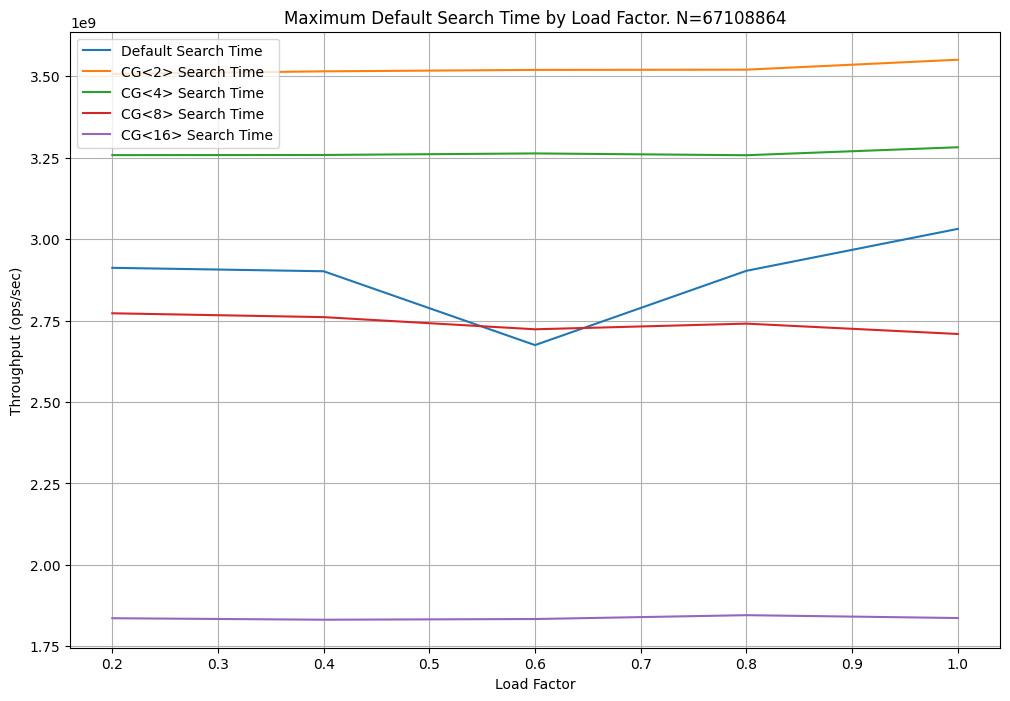

In [31]:
# Plot the graphs
# x-axis - LoadFactor
# y-axis - Throughput_DefaultSearchTime
# In the same graph, plot the throughput different NumElements. Pick the maximum Throughput_DefaultSearchTime for each LoadFactor

# Filter rows to pick a particular N
N = 67108864
plt.figure(figsize=(12, 8))

for cg in cgs:
    data_N = data[cg][data[cg]['NumElements'] == N]

    grouped_data = data_N.groupby(['LoadFactor']).agg({
        'Throughput_DefaultSearchTime': 'max',
        'Throughput_CGSearchTime': 'max'
    }).reset_index()

    if cg==2:
        plt.plot(grouped_data['LoadFactor'], grouped_data['Throughput_DefaultSearchTime'], label='Default Search Time')
    plt.plot(grouped_data['LoadFactor'], grouped_data['Throughput_CGSearchTime'], label=f'CG<{cg}> Search Time')


# cuco_grouped_data = cuco_data[cuco_data['NumKeys'] == N]

# plt.plot(cuco_grouped_data['LoadFactor'],
#          cuco_grouped_data['FindThroughput'], label='Kokkos Default Search Time')

plt.title(f'Maximum Default Search Time by Load Factor. N={N}')
plt.xlabel('Load Factor')
plt.ylabel('Throughput (ops/sec)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

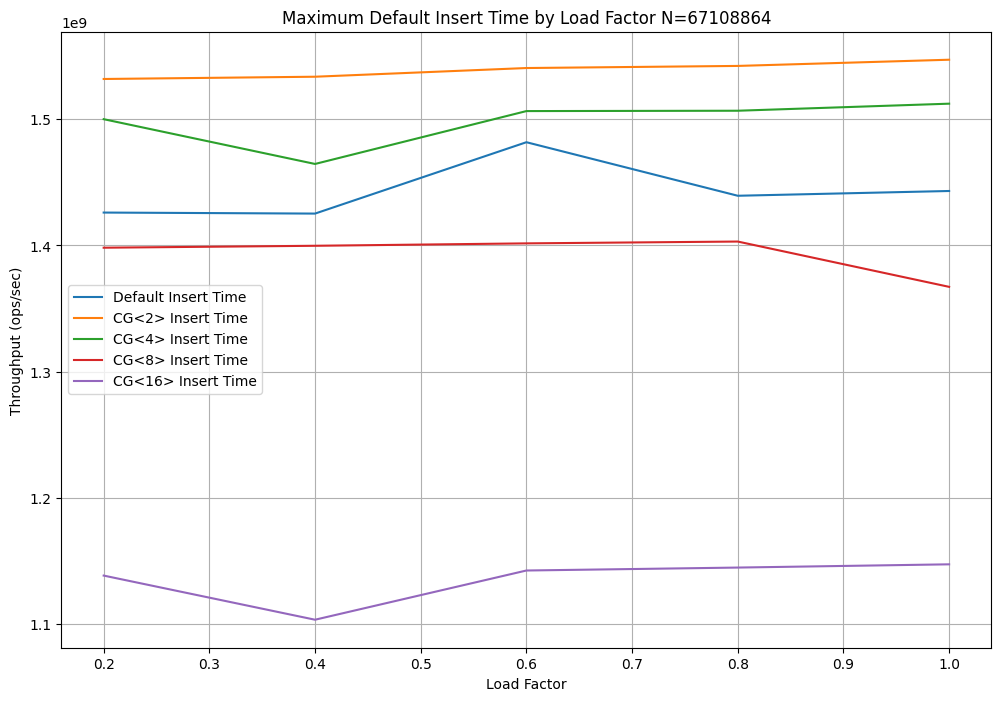

In [32]:
# Plot the graphs
# x-axis - LoadFactor
# y-axis - Throughput_DefaultInsertTime
# In the same graph, plot the throughput different NumElements. Pick the maximum Throughput_DefaultInsertTime for each LoadFactor

# Filter rows to pick a particular N
N = 67108864
plt.figure(figsize=(12, 8))

for cg in cgs:
    data_N = data[cg][data[cg]['NumElements'] == N]

    grouped_data = data_N.groupby(['LoadFactor']).agg({
        'Throughput_DefaultInsertTime': 'max',
        'Throughput_CGInsertTime': 'max'
    }).reset_index()

    if cg == 2:
        plt.plot(grouped_data['LoadFactor'],
                 grouped_data['Throughput_DefaultInsertTime'], label='Default Insert Time')
    plt.plot(grouped_data['LoadFactor'],
             grouped_data['Throughput_CGInsertTime'], label=f'CG<{cg}> Insert Time')


# cuco_grouped_data = cuco_data[cuco_data['NumKeys'] == N]

# plt.plot(cuco_grouped_data['LoadFactor'],
#          cuco_grouped_data['InsertThroughput'], label='CuCollections Default Search Time')

plt.title(f'Maximum Default Insert Time by Load Factor N={N}')
plt.xlabel('Load Factor')
plt.ylabel('Throughput (ops/sec)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

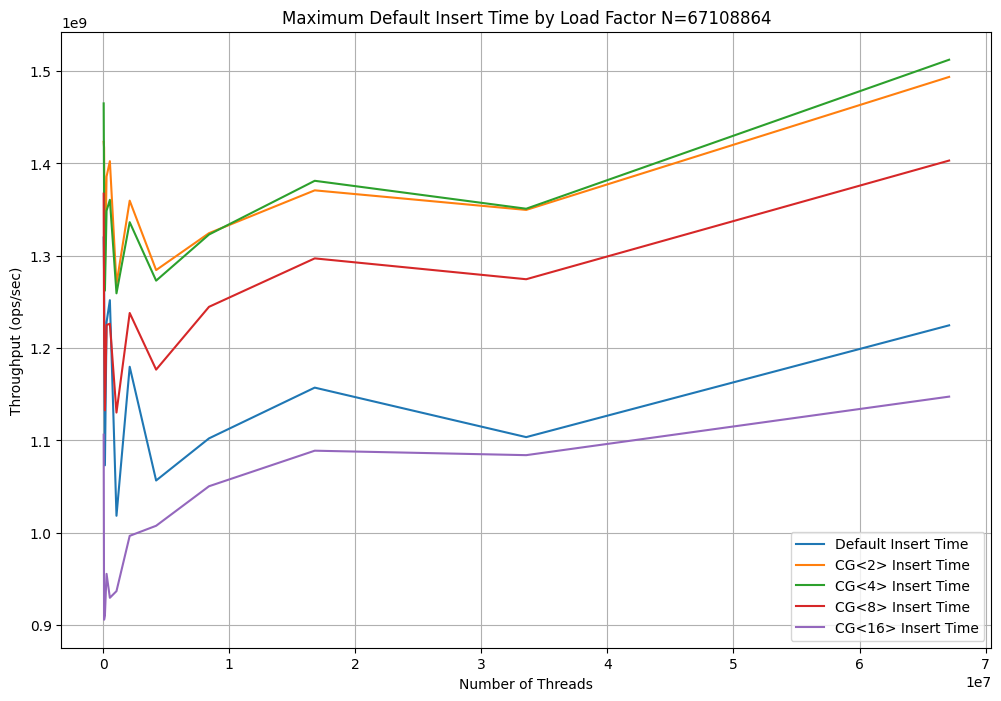

In [42]:
# Plot the graphs
# x-axis - Number of Threads = ThreadsPerBlock*NumBlocks
# y-axis - Throughput_DefaultInsertTime
# In the same graph, plot the throughput different NumElements. Pick the maximum Throughput_DefaultInsertTime for each LoadFactor

# Filter rows to pick a particular N
N = 67108864
plt.figure(figsize=(12, 8))
# plt.xscale('log', base=2)  # Set the x-axis scale to log base 2

for cg in cgs:
    data_N = data[cg][data[cg]['NumElements'] == N]
    
    grouped_data = data_N.groupby(['NumThreads', 'LoadFactor']).agg({
        'Throughput_DefaultInsertTime': 'mean',
        'Throughput_CGInsertTime': 'mean'
    }).reset_index()

    grouped_data = grouped_data.groupby(['NumThreads']).agg({
        'Throughput_DefaultInsertTime': 'max',
        'Throughput_CGInsertTime': 'max'
    }).reset_index()

    if cg == 2:
        plt.plot(grouped_data['NumThreads'],
                 grouped_data['Throughput_DefaultInsertTime'], label='Default Insert Time')
    plt.plot(grouped_data['NumThreads'],
             grouped_data['Throughput_CGInsertTime'], label=f'CG<{cg}> Insert Time')


plt.title(f'Maximum Default Insert Time by Load Factor N={N}')
plt.xlabel('Number of Threads')
plt.ylabel('Throughput (ops/sec)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

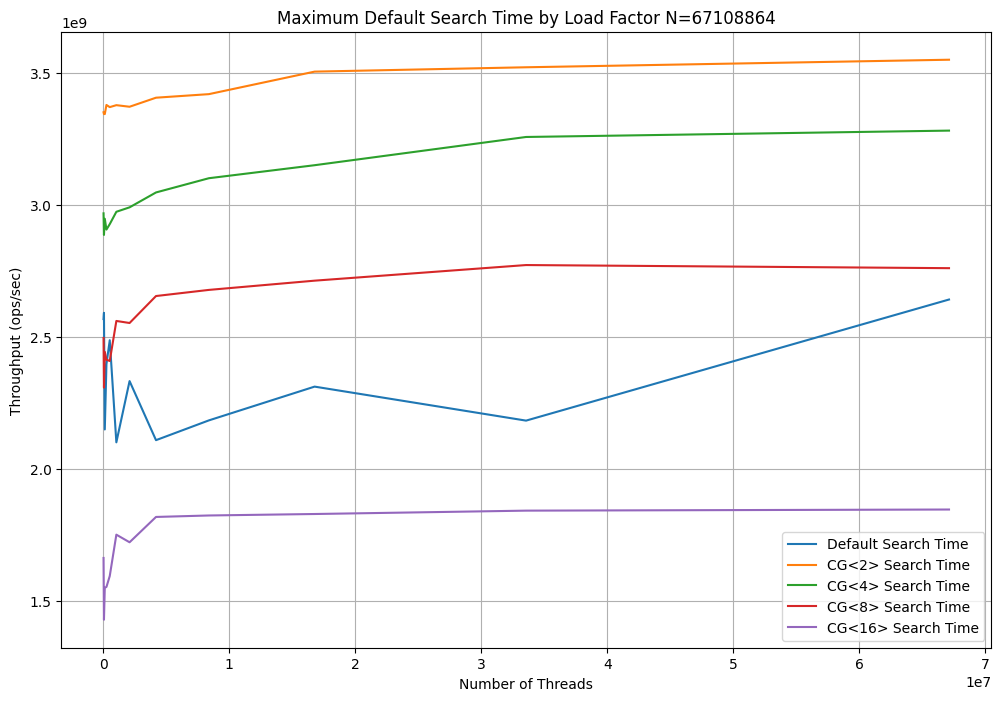

In [43]:
# Plot the graphs
# x-axis - Number of Threads = ThreadsPerBlock*NumBlocks
# y-axis - Throughput_DefaultInsertTime
# In the same graph, plot the throughput different NumElements. Pick the maximum Throughput_DefaultInsertTime for each LoadFactor

# Filter rows to pick a particular N
N = 67108864
plt.figure(figsize=(12, 8))
# plt.xscale('log', base=2)  # Set the x-axis scale to log base 2

for cg in cgs:
    data_N = data[cg][data[cg]['NumElements'] == N]

    grouped_data = data_N.groupby(['NumThreads', 'LoadFactor']).agg({
        'Throughput_DefaultSearchTime': 'mean',
        'Throughput_CGSearchTime': 'mean'
    }).reset_index()

    grouped_data = grouped_data.groupby(['NumThreads']).agg({
        'Throughput_DefaultSearchTime': 'max',
        'Throughput_CGSearchTime': 'max'
    }).reset_index()

    if cg == 2:
        plt.plot(grouped_data['NumThreads'],
                 grouped_data['Throughput_DefaultSearchTime'], label='Default Search Time')
    plt.plot(grouped_data['NumThreads'],
             grouped_data['Throughput_CGSearchTime'], label=f'CG<{cg}> Search Time')


plt.title(f'Maximum Default Search Time by Load Factor N={N}')
plt.xlabel('Number of Threads')
plt.ylabel('Throughput (ops/sec)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()